<a href="https://colab.research.google.com/github/heyronith/sentimentalanalysis/blob/main/%23ElonMusk%20Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tweepy as tw
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 


In [6]:
consumer_key='Lgvm5nxlT7MeDqemfytZnbD4h'
consumer_secret='omLNO595LoxcMmy1RSrD0w7QCDipqkwjpJVsnv6P4iZnH77b5B'
access_token='1547442958382809088-a4Rj1SY9Bvmn7TCuWSGdM06V5QyMly'
access_token_secret='TA3dplCocME6ibTxG5yYr56K7g0wRFmpUJyLVJvTjXQpm'

In [7]:
#auth twitter

auth= tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api= tw.API(auth,wait_on_rate_limit=True)

In [8]:
#getting the tweets
hashtag = '#ElonMusk'
query= tw.Cursor(api.search, q=hashtag).items(1000)
tweets=[{"Tweets":tweet.text, 'Timestamp':tweet.created_at} for tweet in query]


In [11]:
print(tweets)

[{'Tweets': 'RT @metabilliards: Meta Billiards challange! \n\nClick here and participate for a chance to win great prizes! 👇👇👇👇👇\n\nhttps://t.co/nOHBSJQ8yN…', 'Timestamp': datetime.datetime(2022, 7, 24, 5, 0, 47)}, {'Tweets': 'Elon Musk’s Tesla has revealed in their second quarter update that they sold 75 per cent of their Bitcoin purchases… https://t.co/V3BAb5HS5i', 'Timestamp': datetime.datetime(2022, 7, 24, 5, 0, 33)}, {'Tweets': 'RT @MarkFarentino: Felicity BoulAvard atBook Distributors Worldwide https://t.co/p7jZxEKsFz…#ElClasico #ECGproductions #ElonMusk #ENGvIND #…', 'Timestamp': datetime.datetime(2022, 7, 24, 5, 0, 10)}, {'Tweets': 'RT @LunchWithElonM: Day 102 of asking @elonmusk to lunch :) \n-----------------------------------------\n\nEver look at some conspiracies peop…', 'Timestamp': datetime.datetime(2022, 7, 24, 5, 0, 1)}, {'Tweets': '#ElonMusk #avrupa #AMERIKA #RecepTayyipErdogan #Japonya lütfen gerçek desteğinizi verin, Ukrayna 5 ay aydır Rusya’n… https://t.co/l52rF0jG

In [12]:
df=pd.DataFrame(tweets)

In [13]:
df.Tweets.head()

0    RT @metabilliards: Meta Billiards challange! \...
1    Elon Musk’s Tesla has revealed in their second...
2    RT @MarkFarentino: Felicity BoulAvard atBook D...
3    RT @LunchWithElonM: Day 102 of asking @elonmus...
4    #ElonMusk #avrupa #AMERIKA #RecepTayyipErdogan...
Name: Tweets, dtype: object

In [14]:
df['Tweets'] = df['Tweets'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [20]:
#cleaning all the unnecessary texts from the tweets

df['Tweets']=df['Tweets'].str.replace('[^\w\s]',"")
df['Tweets']=df['Tweets'].str.replace('rt',"")
df['Tweets']=df['Tweets'].str.replace('#ElonMusk',"")

df.Tweets.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


0     metabilliards meta billiards challange click ...
1    elon musks tesla has revealed in their second ...
2     markfarentino felicity boulavard atbook distr...
3     lunchwithelonm day 102 of asking elonmusk to ...
4    elonmusk avrupa amerika receptayyiperdogan jap...
Name: Tweets, dtype: object

In [25]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop=stopwords.words('english')
df['Tweets'] = df['Tweets'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop))

In [34]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [39]:
!pip install vaderSentiment
!pip install Seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import seaborn as sns
cp=sns.color_palette()
import nltk 
import nltk.data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

A=SentimentIntensityAnalyzer()

In [42]:
emptyline=[]
for row in df['Tweets']:
    r=A.polarity_scores(row)
    emptyline.append(r)

In [45]:
newdf=pd.DataFrame(emptyline)
newdf.tail()

,neg,neu,pos,compound
401,0.0,1.000,0.000,0.0000
402,0.0,1.000,0.000,0.0000
403,0.0,0.526,0.474,0.6486
404,0.0,0.352,0.648,0.9169
405,0.0,1.000,0.000,0.0000


In [46]:


#adding this newdf to the actual dataset

df_c=pd.concat([df.reset_index(drop=True),newdf],axis=1)
df_c.head()



,Tweets,Timestamp,neg,neu,pos,compound
0,metabilliards meta billiards challange click p...,2022-07-24 05:00:47,0.0,0.352,0.648,0.9169
1,elon musks tesla revealed second quaer update ...,2022-07-24 05:00:33,0.0,1.000,0.000,0.0000
2,markfarentino felicity boulavard atbook distri...,2022-07-24 05:00:10,0.0,1.000,0.000,0.0000
3,lunchwithelonm day 102 asking elonmusk lunch e...,2022-07-24 05:00:01,0.0,1.000,0.000,0.0000
4,elonmusk avrupa amerika receptayyiperdogan jap...,2022-07-24 04:59:19,0.0,1.000,0.000,0.0000


In [48]:


df_c['Sentiment']=np.where(df_c['compound']>=0,'Positive','Negative')
df_c.head(10)



,Tweets,Timestamp,neg,neu,pos,compound,Sentiment
0,metabilliards meta billiards challange click p...,2022-07-24 05:00:47,0.000,0.352,0.648,0.9169,Positive
1,elon musks tesla revealed second quaer update ...,2022-07-24 05:00:33,0.000,1.000,0.000,0.0000,Positive
2,markfarentino felicity boulavard atbook distri...,2022-07-24 05:00:10,0.000,1.000,0.000,0.0000,Positive
3,lunchwithelonm day 102 asking elonmusk lunch e...,2022-07-24 05:00:01,0.000,1.000,0.000,0.0000,Positive
4,elonmusk avrupa amerika receptayyiperdogan jap...,2022-07-24 04:59:19,0.000,1.000,0.000,0.0000,Positive
5,eze_fi 1 retweet 2 follow us twitter discord i...,2022-07-24 04:58:23,0.137,0.863,0.000,-0.4019,Negative
6,saudishibtoken tomorrow great day saudishibain...,2022-07-24 04:57:57,0.000,0.709,0.291,0.6249,Positive
7,squadron_five serious nfts serious metaverse s...,2022-07-24 04:56:22,0.281,0.719,0.000,-0.2263,Negative
8,tolandeka rightly said elonmusk aificialintell...,2022-07-24 04:56:17,0.307,0.693,0.000,-0.4767,Negative
9,rightly said elonmusk aificialintelligence far...,2022-07-24 04:56:12,0.341,0.659,0.000,-0.4767,Negative


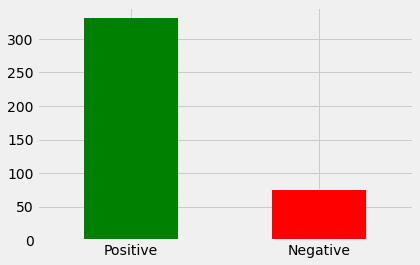

In [49]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar',rot=0,color=['Green','Red'])